Question 1

In [ ]:
library(datasets)


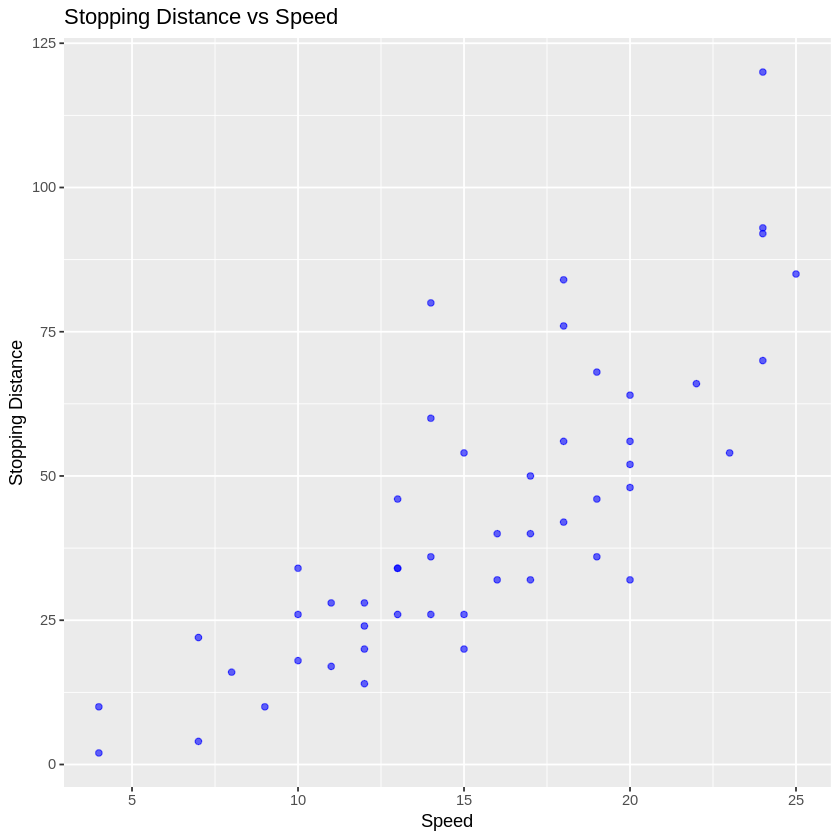

In [ ]:
data(cars)

library(ggplot2)
ggplot(cars, aes(x = speed, y = dist)) +
  geom_point(color = "blue", alpha = 0.6) +
  labs(title = "Stopping Distance vs Speed", x = "Speed", y = "Stopping Distance")


In [ ]:
linear_model <- lm(dist ~ speed, data = cars)
summary(linear_model)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


`geom_smooth()` using formula = 'y ~ x'


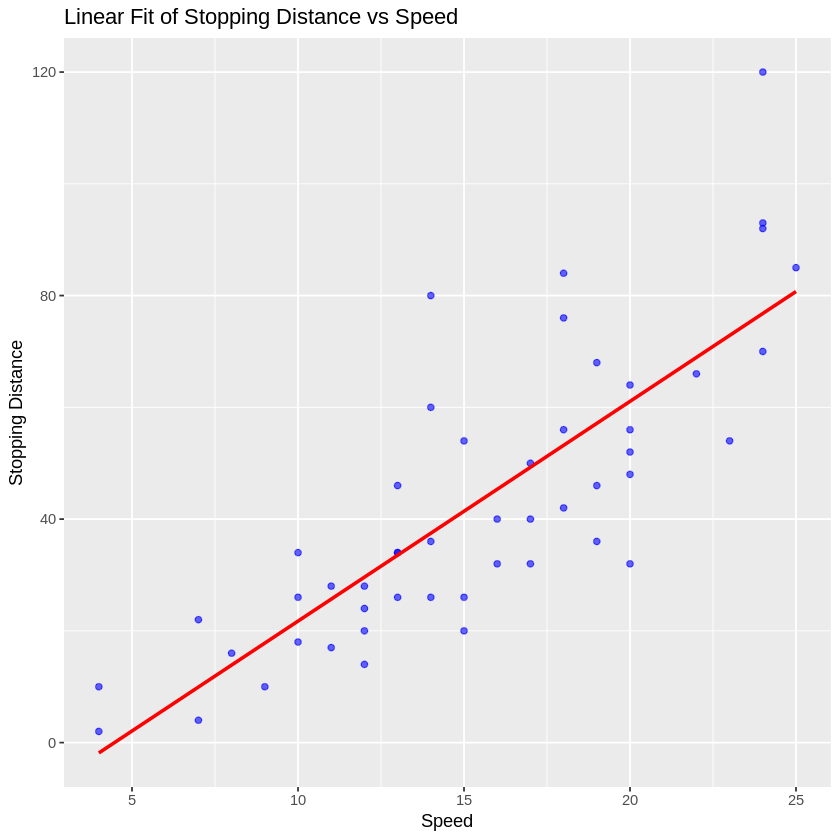

In [ ]:
ggplot(cars, aes(x = speed, y = dist)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Linear Fit of Stopping Distance vs Speed", x = "Speed", y = "Stopping Distance")


In [ ]:
cars$speed_squared <- cars$speed^2
quadratic_model <- lm(dist ~ speed + speed_squared, data = cars)
summary(quadratic_model)


Call:
lm(formula = dist ~ speed + speed_squared, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.720  -9.184  -3.188   4.628  45.152 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)    2.47014   14.81716   0.167    0.868
speed          0.91329    2.03422   0.449    0.656
speed_squared  0.09996    0.06597   1.515    0.136

Residual standard error: 15.18 on 47 degrees of freedom
Multiple R-squared:  0.6673,	Adjusted R-squared:  0.6532 
F-statistic: 47.14 on 2 and 47 DF,  p-value: 5.852e-12


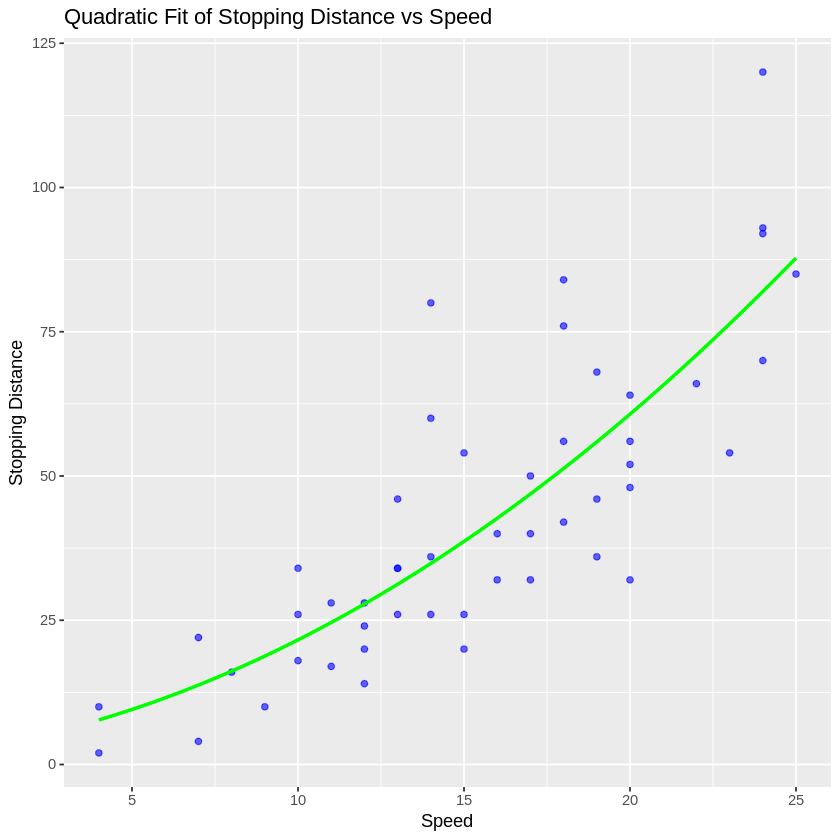

In [ ]:
ggplot(cars, aes(x = speed, y = dist)) +
  geom_point(color = "blue", alpha = 0.6) +
  stat_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "green") +
  labs(title = "Quadratic Fit of Stopping Distance vs Speed", x = "Speed", y = "Stopping Distance")


In [ ]:
cars$sqrt_dist <- sqrt(cars$dist)
sqrt_model <- lm(sqrt_dist ~ speed, data = cars)
summary(sqrt_model)


Call:
lm(formula = sqrt_dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0684 -0.6983 -0.1799  0.5909  3.1534 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.27705    0.48444   2.636   0.0113 *  
speed        0.32241    0.02978  10.825 1.77e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.102 on 48 degrees of freedom
Multiple R-squared:  0.7094,	Adjusted R-squared:  0.7034 
F-statistic: 117.2 on 1 and 48 DF,  p-value: 1.773e-14


`geom_smooth()` using formula = 'y ~ x'


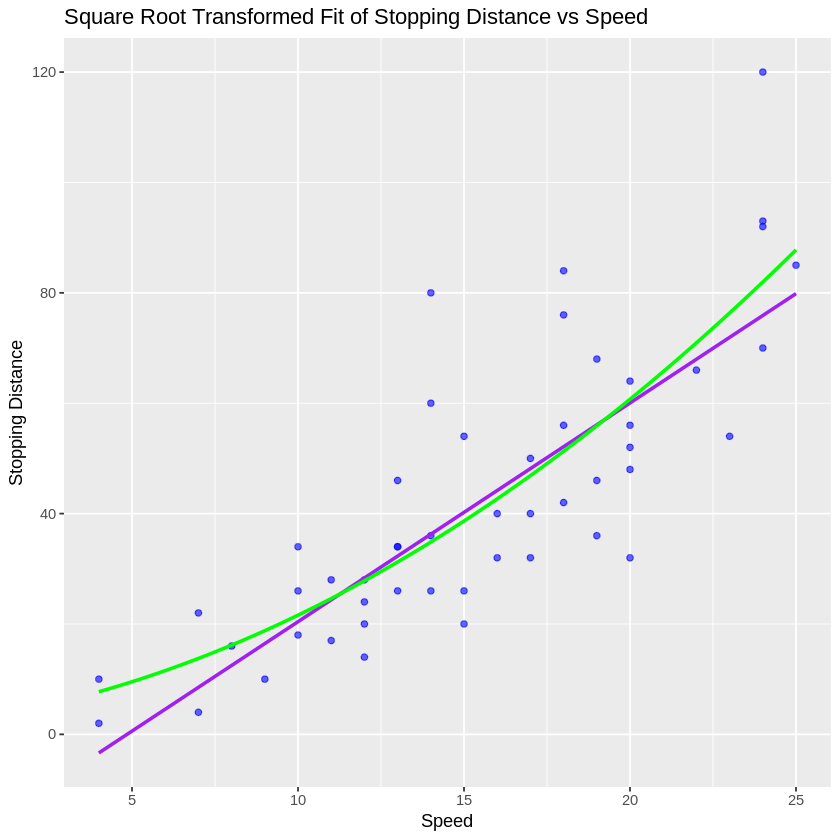

In [ ]:
ggplot(cars, aes(x = speed, y = dist)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "purple", aes(y = sqrt_model$fitted.values^2)) +
  stat_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "green") +
  labs(title = "Square Root Transformed Fit of Stopping Distance vs Speed", x = "Speed", y = "Stopping Distance")


In [ ]:
new_data <- data.frame(speed = 20)
conf_interval <- predict(linear_model, new_data, interval = "confidence", level = 0.95)
pred_interval <- predict(linear_model, new_data, interval = "prediction", level = 0.95)
conf_interval
pred_interval

,fit,lwr,upr
1,61.06908,55.24729,66.89088


,fit,lwr,upr
1,61.06908,29.60309,92.53507


In [ ]:
new_data <- data.frame(speed = 20, speed_squared = 20^2)

quad_pred_interval <- predict(quadratic_model, new_data, interval = "prediction", level = 0.95)

sqrt_pred <- predict(sqrt_model, data.frame(speed = 20), interval = "prediction", level = 0.95)
sqrt_pred_interval <- sqrt_pred^2

quad_pred_interval
sqrt_pred_interval


,fit,lwr,upr
1,60.71961,29.64947,91.78976


,fit,lwr,upr
1,59.68027,29.91906,99.61575


Question 3

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




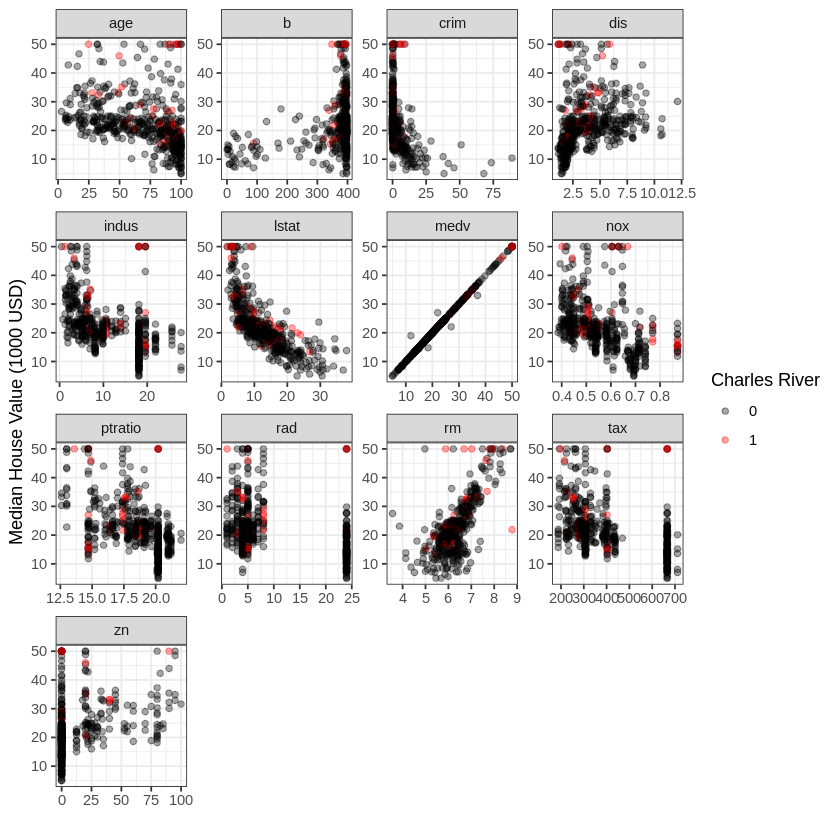

In [ ]:
install.packages("mlbench")
library(mlbench)
library(ggplot2)
library(dplyr)
library(tidyr)

data(BostonHousing2)
dat <- BostonHousing2

p <- dat %>%
  pivot_longer(-all_of(c("town", "tract", "lon", "lat", "cmedv", "chas"))) %>%
  ggplot(aes(x = value, y = cmedv, color = factor(chas))) +
  scale_color_manual(values = c("0" = "black", "1" = "red")) +
  geom_point(alpha = 0.35) +
  facet_wrap(~ name, scales = "free") +
  labs(x = "", y = "Median House Value (1000 USD)", color = "Charles River") +
  theme_bw()



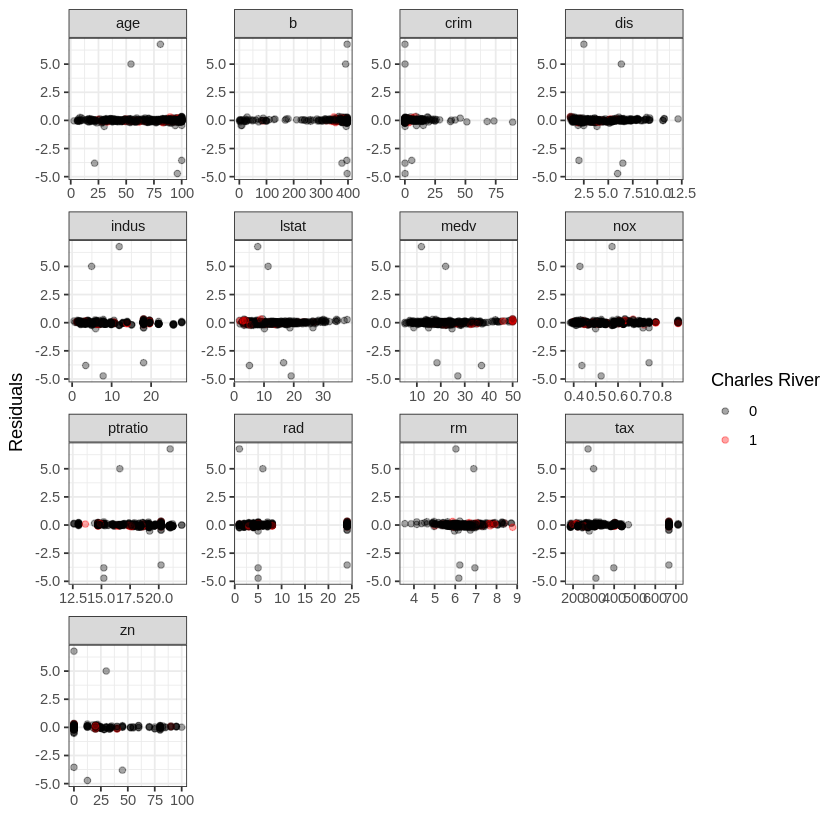

In [ ]:
library(mlbench)
library(ggplot2)
library(dplyr)
library(tidyr)

data(BostonHousing2)
dat <- BostonHousing2

fit <- lm(cmedv ~ . - town - tract - lon - lat, data = dat)

dat$residuals <- residuals(fit)

p_residuals <- dat %>%
  pivot_longer(-all_of(c("town", "tract", "lon", "lat", "cmedv", "chas", "residuals"))) %>%
  ggplot(aes(x = value, y = residuals, color = factor(chas))) +
  scale_color_manual(values = c("0" = "black", "1" = "red")) +
  geom_point(alpha = 0.35) +
  facet_wrap(~ name, scales = "free") +
  labs(x = "", y = "Residuals", color = "Charles River") +
  theme_bw()

print(p_residuals)


In [ ]:
summary(fit)


Call:
lm(formula = cmedv ~ . - town - tract - lon - lat, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7236 -0.0604 -0.0017  0.0599  6.7641 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.482e-01  5.710e-01   0.785   0.4328    
medv         9.853e-01  4.801e-03 205.220   <2e-16 ***
crim         2.236e-04  3.538e-03   0.063   0.9496    
zn           1.985e-03  1.479e-03   1.343   0.1800    
indus        2.996e-03  6.550e-03   0.457   0.6476    
chas1        4.448e-02  9.266e-02   0.480   0.6314    
nox         -2.371e-01  4.156e-01  -0.570   0.5686    
rm           3.552e-02  4.812e-02   0.738   0.4608    
age         -1.071e-04  1.407e-03  -0.076   0.9393    
dis         -4.791e-02  2.239e-02  -2.140   0.0329 *  
rad          2.209e-03  7.217e-03   0.306   0.7597    
tax         -5.513e-04  4.048e-04  -1.362   0.1739    
ptratio      1.483e-02  1.466e-02   1.012   0.3122    
b            5.361e-05  2.895e-04   0.185   0.8532 

H0 : The model with predictors does not give more accurate predictions than simply predicting the outcome by its sample average. H1 : The model with predictors provides a better fit. F-value is less than H0, so we reject H0. The model with predictors provides better fit.

In [ ]:
hatvals <- hatvalues(fit)

residuals <- residuals(fit)

loocv_risk <- mean((residuals / (1 - hatvals))^2)
print(loocv_risk)


[1] 0.2613187


In [ ]:
library(mlbench)
library(dplyr)

data(BostonHousing2)
dat <- BostonHousing2

dat$log_crim <- log(dat$crim + 1)
dat$log_dis <- log(dat$dis + 1)
dat$lstat_poly1 <- poly(dat$lstat, degree = 2)[, 1]
dat$lstat_poly2 <- poly(dat$lstat, degree = 2)[, 2]
dat$lstat_c <- pmax(0, dat$lstat + 0.025)

fit2 <- lm(cmedv ~ . - town - tract - lon - lat - lstat + log_crim + log_dis + lstat_poly1 + lstat_poly2 + lstat_c, data = dat)

anova(fit, fit2)

hatvals2 <- hatvalues(fit2)
residuals2 <- residuals(fit2)
loocv_risk2 <- mean((residuals2 / (1 - hatvals2))^2)

cat("LOOCV Risk for Original Model:", loocv_risk, "\n")
cat("LOOCV Risk for New Model:", loocv_risk2, "\n")



,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,491,125.3934,NA,NA,NA,NA
2,488,123.5684,3,1.824956,2.40239,0.06691612


LOOCV Risk for Original Model: 0.2613187 
LOOCV Risk for New Model: 0.2610195 


In [ ]:

new_data <- data.frame(
  town = factor(" "),
  tract = NA,
  lon = NA,
  lat = NA,
  crim = 0.20,
  zn = 0,
  indus = 12,
  chas = 1,
  nox = median_values$nox,
  rm = 6.5,
  age = 30,
  dis = median_values$dis,
  rad = median_values$rad,
  tax = median_values$tax,
  ptratio = median_values$ptratio,
  b = median_values$b,
  lstat = median_values$lstat
)

new_data$log_crim <- log(new_data$crim + 1)
new_data$log_dis <- log(new_data$dis + 1)
new_data$lstat_poly1 <- poly(dat$lstat, degree = 2)[, 1] %>% quantile(0.5)
new_data$lstat_poly2 <- poly(dat$lstat, degree = 2)[, 2] %>% quantile(0.5)
new_data$lstat_c <- pmax(0, new_data$lstat + 0.025)

conf_interval <- predict(fit2, newdata = new_data, interval = "confidence")
pred_interval <- predict(fit2, newdata = new_data, interval = "prediction")

cat("Confidence Interval for Average Housing Price:", conf_interval, "\n")
cat("Prediction Interval for a New Observation:", pred_interval, "\n")


ERROR: Error in eval(predvars, data, env): object 'medv' not found


In [ ]:
if (!require("conformalInference")) {
  library(devtools)
  install_github("ryantibs/conformal", subdir = "conformalInference", force = TRUE)
}
library(conformalInference)

y <- dat$cmedv
x.mat <- model.matrix(~ . - town - tract - lon - lat + log_crim + log_dis + lstat_poly1 + lstat_poly2 + lstat_c, data = dat)

new_data.mat <- model.matrix(~ . - town - tract - lon - lat + log_crim + log_dis + lstat_poly1 + lstat_poly2 + lstat_c, data = new_data)

funs <- lm.funs()

conf.pred.res <- conformal.pred(
  x = x.mat,
  y = y,
  x0 = new_data.mat,
  alpha = 0.05,
  train.fun = funs$train,
  predict.fun = funs$predict
)

print(conf.pred.res)


ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels
